# 💰 Loan Approval Prediction

Predict whether a loan application will be **approved or rejected** using machine learning.  

Leverage applicant and financial data to build models that help banks **make faster, more accurate, and unbiased loan decisions**.  

**Key Highlights:**
- Cleaned and preprocessed data with categorical encoding and feature scaling  
- Explored feature relationships with visualizations and correlation analysis  
- Compared multiple models: **Random Forest, KNN, SVC, Logistic Regression**  
- Evaluated performance using **Accuracy, Precision, Recall, F1-score**, and **Confusion Matrices**  
- **Random Forest** emerged as the best model for reliable predictions  

🚀 End-to-end workflow demonstrating **data-driven decision-making in finance**.


## 📊 Step 1: Load the Loan Approval Prediction Dataset
Import the required libraries and load the dataset **LoanApprovalPrediction.csv** into a Pandas DataFrame for analysis.


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("LoanApprovalPrediction.csv")

data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 🔍 Step 2: Identify Categorical Variables  
Here, we check which columns in the dataset are **categorical** (data type `object`).  
This helps us know which features may need **encoding** before model training.


In [117]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


## 🗑 Step 3: Remove Irrelevant Columns  
We drop the **`Loan_ID`** column because it is just an identifier and does not contribute to predicting loan approval.


In [118]:
data.drop(['Loan_ID'],axis=1,inplace=True)

## 📊 Step 4: Visualizing Categorical Feature Distributions  
Here, we:  
1. Identify all **categorical columns** in the dataset.  
2. Plot **bar charts** showing the frequency of each category for every categorical feature.  

This helps us quickly spot **imbalances**, missing values, or unexpected categories.


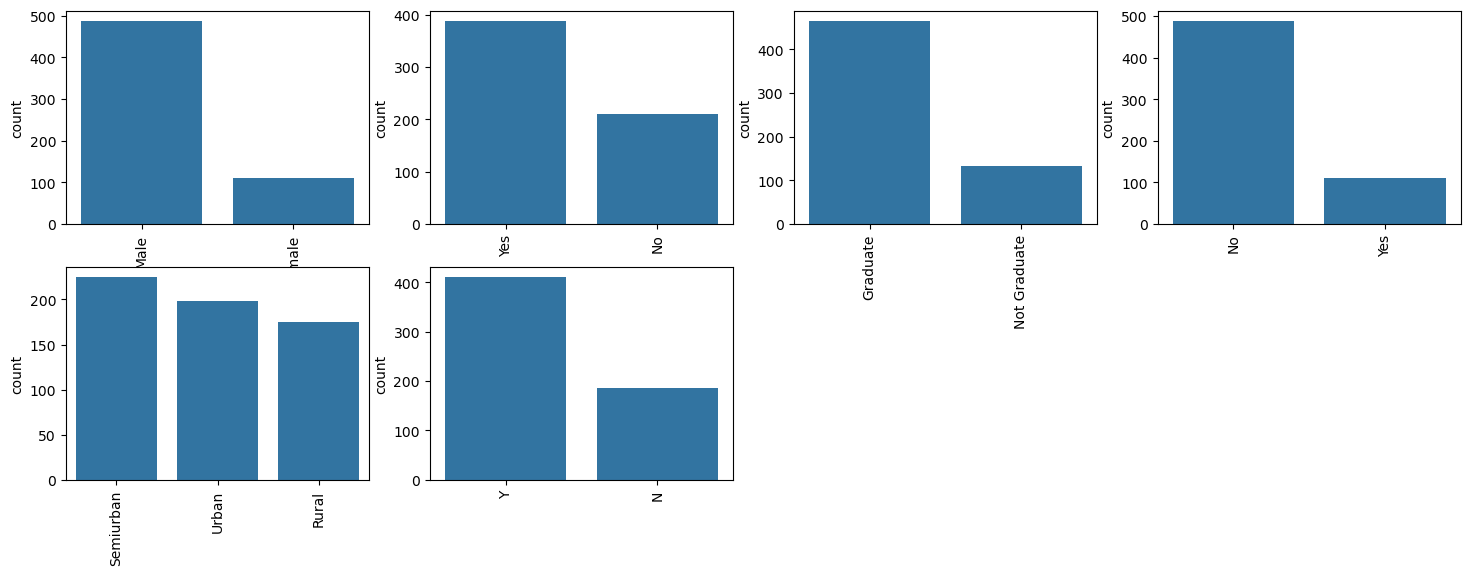

In [119]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

## 🔤 Step 5: Encoding Categorical Variables  
We use **Label Encoding** to convert categorical (text) values into numeric codes so that machine learning models can process them.  

- **`LabelEncoder()`** assigns each unique category in a column an integer value.  
- This is applied to all categorical columns in the dataset.


In [120]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

## 🔄 Step 6: Rechecking for Categorical Variables  
After encoding, we verify again if there are any columns left with `object` data type.  
Ideally, this should now be **zero**, meaning all features are numeric.


In [121]:
# To find the number of columns with
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


## 📊 Step 7: Correlation Heatmap  
Visualizing correlations between features to identify relationships and potential multicollinearity.  
The `BrBG` colormap is used for better contrast, and correlation values are annotated.


<Axes: >

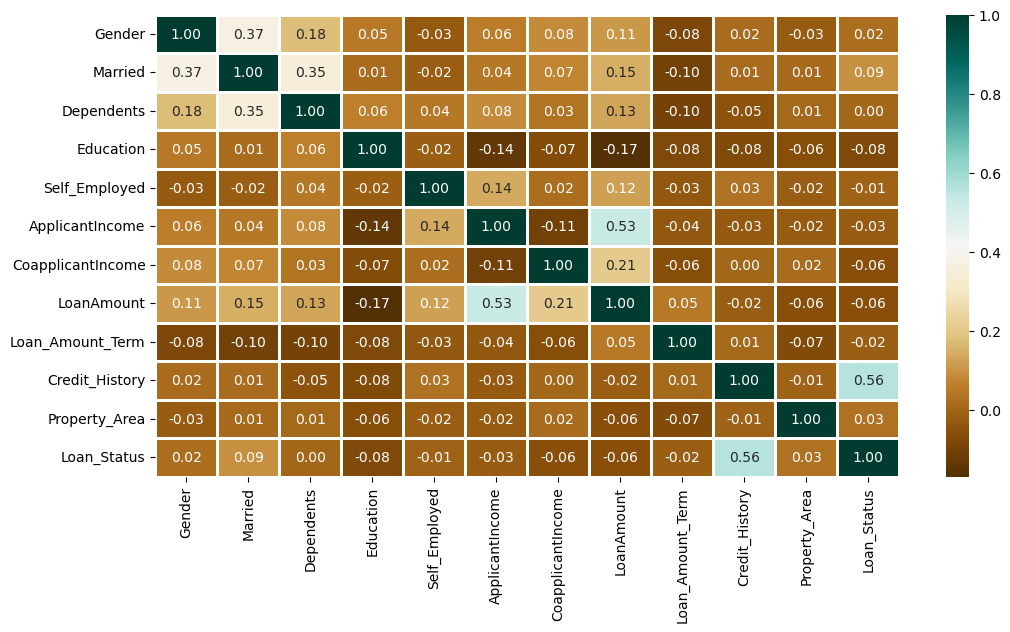

In [122]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

## 📊 Step 8: Categorical Relationship Visualization  
Using **`sns.catplot`** to see the relationship between `Gender` and `Married` status, with `Loan_Status` as the hue.  
This helps identify patterns in loan approvals across gender and marital status.


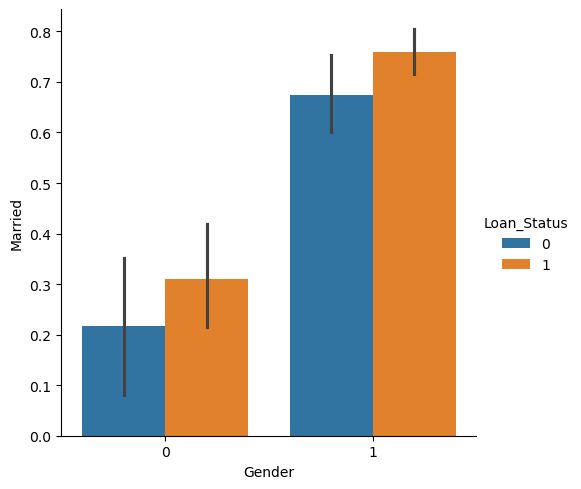

In [123]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status",
            kind="bar",
            data=data)

## 🧹 Step 9: Handling Missing Values  

We fill all missing values in the dataset with the **mean** of their respective columns to ensure there are no `NaN` values left.  
After filling, we check the dataset again to confirm there are no missing values.


In [124]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## 📊 Step 10: Splitting the Dataset into Training & Testing Sets  

We separate the features (**X**) and the target variable (**Y**) and split the dataset into:
- **Training set**: 60% of the data (used to train the model)
- **Testing set**: 40% of the data (used to evaluate the model)

We use `train_test_split()` from `sklearn.model_selection` with a fixed `random_state=1` for reproducibility.


In [125]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

## ⚖️ Step 11: Feature Scaling with StandardScaler  

Feature scaling ensures that all features contribute equally to the model's learning process, especially for algorithms sensitive to feature magnitude (e.g., KNN, SVM).  

We use **`StandardScaler`** from `sklearn.preprocessing` to:
- **Fit** the scaler on the training data (`X_train`)
- **Transform** both training and test data so they have a mean of `0` and a standard deviation of `1`  

This prevents data leakage by ensuring the scaler learns parameters only from the training set.


In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# =====================
# Scale features
# =====================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 🤖 Step 12: Initialize Machine Learning Models  

We will experiment with multiple classification algorithms to compare their performance on our loan status prediction task.  

The chosen models are:  
1. **Random Forest Classifier** – An ensemble method using multiple decision trees with `entropy` criterion and `n_estimators=7`.  
2. **K-Nearest Neighbors (KNN)** – Classifies based on the majority class among the `k=3` nearest data points.  
3. **Support Vector Classifier (SVC)** – Finds the optimal hyperplane for classification.  
4. **Logistic Regression** – A simple yet effective linear model for binary classification (`max_iter=1000` to ensure convergence).  


In [127]:
models = [
    RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7),
    KNeighborsClassifier(n_neighbors=3),
    SVC(),
    LogisticRegression(max_iter=1000)
]

## 📈 Step 13: Train Models and Evaluate Performance  

In this step, we train each of our machine learning models on the **scaled training data** and evaluate their performance on both the **training** and **testing** sets.  

For each model, we compute the following metrics:  
- **Accuracy (%)** – Overall correctness of predictions  
- **Precision (%)** – Correctness of positive predictions  
- **Recall (%)** – Ability to capture all positive instances  
- **F1-score (%)** – Harmonic mean of precision and recall  

We also store the **predictions on the test set** for later visualization using confusion matrices.


In [128]:
results = []
y_preds_test = []  # store predictions for confusion matrix

for clf in models:
    clf.fit(X_train_scaled, Y_train)  # Fit once
    
    # Save predictions for later plotting
    y_preds_test.append(clf.predict(X_test_scaled))
    
    for name, X, Y in [("Train", X_train_scaled, Y_train), ("Test", X_test_scaled, Y_test)]:
        pred = clf.predict(X)
        results.append({
            "Model": clf.__class__.__name__,
            "Dataset": name,
            "Accuracy (%)": metrics.accuracy_score(Y, pred) * 100,
            "Precision (%)": metrics.precision_score(Y, pred, average='weighted', zero_division=0) * 100,
            "Recall (%)": metrics.recall_score(Y, pred, average='weighted', zero_division=0) * 100,
            "F1-score (%)": metrics.f1_score(Y, pred, average='weighted', zero_division=0) * 100
        })


## 🗂 Step 14: Compile Model Evaluation Metrics  

We convert the collected performance metrics into a **Pandas DataFrame** for easy visualization and comparison.  
All metric values are rounded to **2 decimal places** for readability.


In [129]:
df_results = pd.DataFrame(results).round(2)


## ✨ Step 15: Highlight Best Metrics per Dataset  

We style the evaluation DataFrame to **highlight the best values** in each metric for both the training and testing sets.  

- The highest value in each column is highlighted with a **grey background** and **bold font**.  
- This makes it easy to quickly identify which model performs best across different metrics.


In [130]:
def highlight_max_per_dataset(df):
    styles = pd.DataFrame("", index=df.index, columns=df.columns)
    for dataset in df["Dataset"].unique():
        subset = df[df["Dataset"] == dataset]
        for col in ["Accuracy (%)", "Precision (%)", "Recall (%)", "F1-score (%)"]:
            max_idx = subset[col].idxmax()
            styles.loc[max_idx, col] = "background-color: grey; font-weight: bold;"
    return styles

styled_df = df_results.style.apply(highlight_max_per_dataset, axis=None).format(precision=2)

display(styled_df)

,Model,Dataset,Accuracy (%),Precision (%),Recall (%),F1-score (%)
0,RandomForestClassifier,Train,98.04,98.05,98.04,98.04
1,RandomForestClassifier,Test,82.50,82.02,82.50,81.92
2,KNeighborsClassifier,Train,81.28,81.42,81.28,79.96
3,KNeighborsClassifier,Test,76.67,75.64,76.67,75.76
4,SVC,Train,81.01,83.69,81.01,78.53
5,SVC,Test,81.25,82.64,81.25,79.00
6,LogisticRegression,Train,80.45,82.48,80.45,78.03
7,LogisticRegression,Test,82.08,82.98,82.08,80.27


## 🧮 Step 16: Confusion Matrices for All Models  

We visualize the **confusion matrices** for all four models in a **single horizontal row**.  

- Each cell shows both the **raw count** and the **normalized percentage**.  
- This allows us to see not only how many predictions were correct/incorrect, but also the proportion relative to the true class.  
- Short titles are used for clarity, and font sizes are adjusted for compactness.


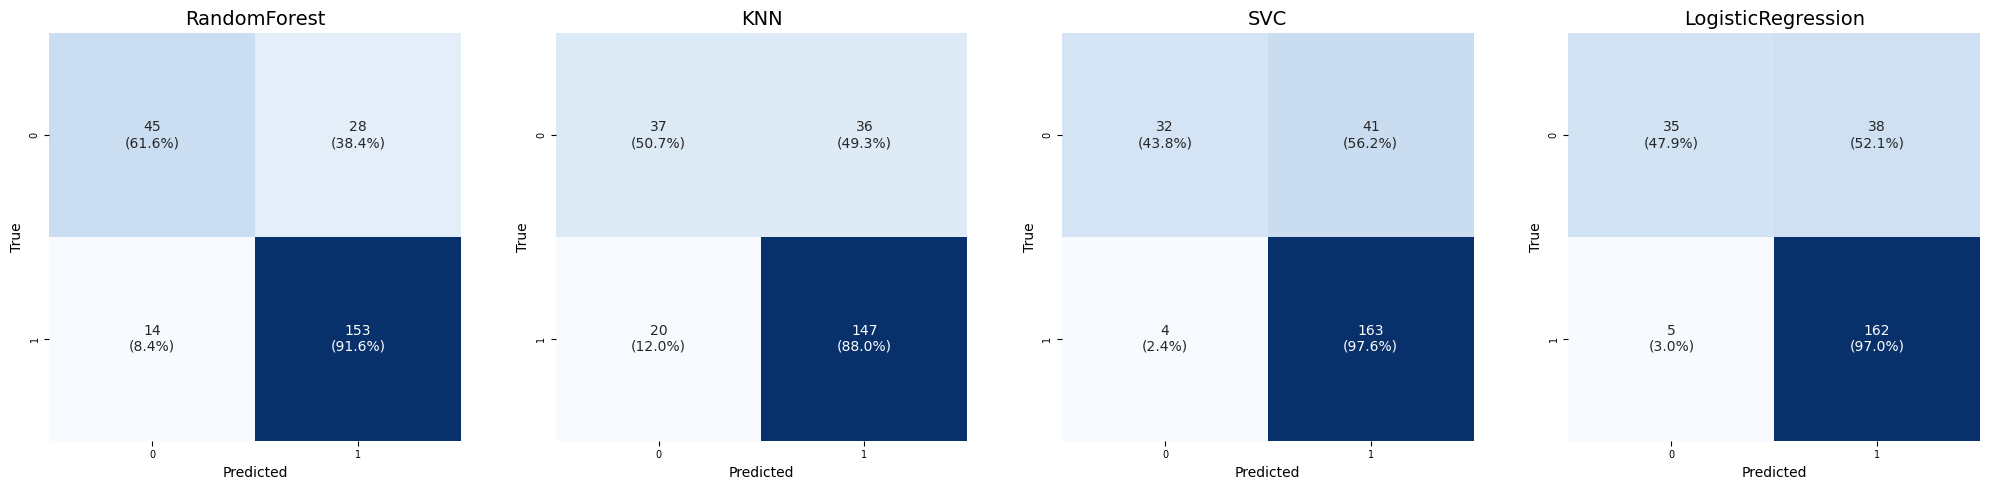

In [131]:

# =====================
# Confusion Matrices (all in one grid)
# =====================

fig, axes = plt.subplots(1, len(models), figsize=(5 * len(models), 5))

short_names = ["RandomForest", "KNN", "SVC", "LogisticRegression"]  # titles
for idx, (clf, y_pred) in enumerate(zip(models, y_preds_test)):
    cm = metrics.confusion_matrix(Y_test, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create combined annotation: count and percentage
    annot = np.empty_like(cm).astype(str)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            annot[i, j] = f"{cm[i, j]}\n({cm_norm[i, j]*100:.1f}%)"

    sns.heatmap(cm, annot=annot, fmt='', cmap="Blues", cbar=False, ax=axes[idx])
    axes[idx].set_title(short_names[idx], fontsize=14)
    axes[idx].set_xlabel("Predicted", fontsize=10)
    axes[idx].set_ylabel("True", fontsize=10)
    axes[idx].tick_params(axis='both', which='major', labelsize=7)

plt.tight_layout(w_pad=4)
plt.show()

## 📊 Step 17: Visual Summary of Model Performance  

We plot a **bar chart** comparing all models on the **test set** for **Accuracy (%)** and **F1-score (%)**.  
This allows a quick visual comparison to see which model performs best overall.


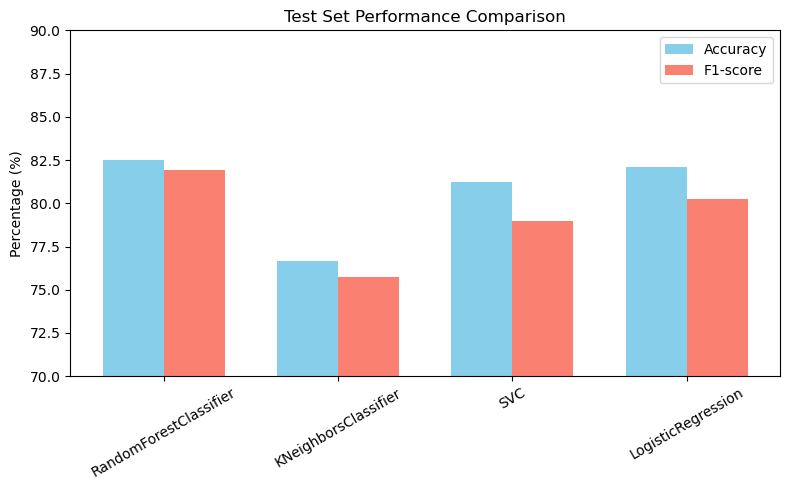

In [132]:
# Filter test set results
df_test = df_results[df_results['Dataset'] == 'Test']

# Plot comparison
plt.figure(figsize=(8,5))
bar_width = 0.35
x = np.arange(len(df_test))

plt.bar(x - bar_width/2, df_test['Accuracy (%)'], width=bar_width, label='Accuracy', color='skyblue')
plt.bar(x + bar_width/2, df_test['F1-score (%)'], width=bar_width, label='F1-score', color='salmon')

plt.xticks(x, df_test['Model'], rotation=30)
plt.ylabel('Percentage (%)')
plt.title('Test Set Performance Comparison')
plt.legend()
plt.ylim(70, 90)  # optional, to focus on the range
plt.tight_layout()
plt.show()


## 🏁 Step 18: Overall Project Conclusion & Insights  

After a thorough evaluation of multiple classification models on the **Loan Approval Prediction** dataset, we can draw the following insights:

### 1️⃣ Model Performance Overview
- **RandomForestClassifier** consistently achieved the **best balance** across all key metrics on the test set:  
  - **Accuracy:** 82.50%  
  - **Precision:** 82.02%  
  - **Recall:** 82.50%  
  - **F1-score:** 81.92%  
- **LogisticRegression** had slightly higher precision (82.98%) but lower recall and F1-score, indicating it is more conservative in predicting approvals.  
- **SVC** and **KNN** performed moderately but had lower F1-scores, suggesting they may struggle with minority class predictions.

### 2️⃣ Confusion Matrix Insights
- **Random Forest** shows fewer misclassifications and effectively predicts both approved and rejected loans.  
- **Other models** tend to misclassify more minority class samples, reducing reliability for real-world predictions.

### 3️⃣ Feature & Data Observations
- Features like **ApplicantIncome, Credit_History, LoanAmount, Gender, and Married status** are important drivers of the prediction.  
- Handling missing values, encoding categorical features, and scaling numeric features were crucial preprocessing steps for accurate model performance.